In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.describe()

,global_cases
count,9.100000e+01
mean,6.489046e+05
std,8.618542e+05
min,2.798000e+03
25%,7.426800e+04
50%,1.252600e+05
75%,1.092696e+06
max,2.878196e+06


In [6]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [7]:
data.tail()

,global_cases
date,
2020-04-23,2544792
2020-04-24,2626321
2020-04-25,2719897
2020-04-26,2804796
2020-04-27,2878196


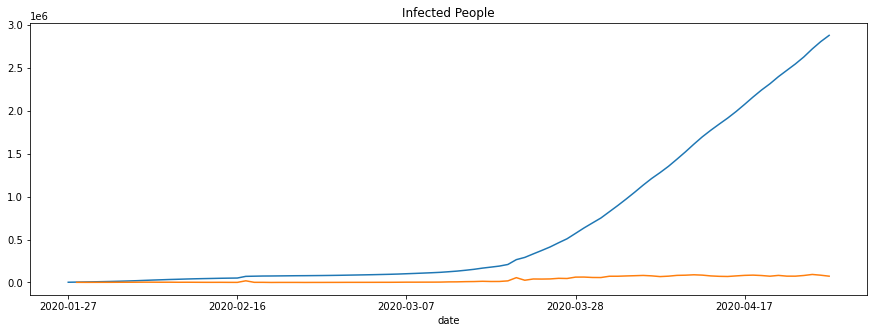

In [8]:
data.global_cases.plot(figsize=(15, 5), title='Infected People')
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [10]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1825.499, BIC=1840.431, Fit time=3.959 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1842.960, BIC=1847.937, Fit time=0.038 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1834.582, BIC=1842.048, Fit time=0.421 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1831.227, BIC=1838.693, Fit time=0.383 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=1827.475, BIC=1844.895, Fit time=6.373 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1835.047, BIC=1847.490, Fit time=2.689 seconds
Fit ARIMA: order=(2, 2, 3); AIC=1834.460, BIC=1851.881, Fit time=5.617 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1833.095, BIC=1843.050, Fit time=2.246 seconds
Fit ARIMA: order=(3, 2, 3); AIC=1830.160, BIC=1850.069, Fit time=16.410 seconds
Total fit time: 38.396 seconds


In [11]:
stepwise_model.aic()

1825.4988573766234

In [12]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-28 - 2958158
2020-04-29 - 3041045
2020-04-30 - 3125464
2020-05-01 - 3210893
2020-05-02 - 3297144
